In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(150,150,3))

2025-10-12 11:52:25.103754: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-10-12 11:52:25.103779: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-10-12 11:52:25.103785: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.88 GB
2025-10-12 11:52:25.103804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-12 11:52:25.103815: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
conv_base.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
conv_base.trainable=False

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/Users/owner/Desktop/deep-learning/CNN/CatvsDog/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/Users/owner/Desktop/deep-learning/CNN/CatvsDog/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 12841 images belonging to 2 classes.
Found 2290 images belonging to 2 classes.


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'],jit_compile=True)

/Users/owner/Desktop/deep-learning/tensorflow/lib/python3.11/site-packages/keras/src/trainers/trainer.py:212: UserWarning: Model doesn't support `jit_compile=True`. Proceeding with `jit_compile=False`.
  warnings.warn(


In [13]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10


/Users/owner/Desktop/deep-learning/tensorflow/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-10-12 11:52:29.854300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.9740 - loss: 0.1904 - val_accuracy: 0.7131 - val_loss: 1.0454
Epoch 2/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9817 - loss: 0.0612 - val_accuracy: 0.7782 - val_loss: 0.7415
Epoch 3/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9822 - loss: 0.0580 - val_accuracy: 0.8227 - val_loss: 0.5752
Epoch 4/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.8301 - val_loss: 0.5018
Epoch 5/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9850 - loss: 0.0501 - val_accuracy: 0.8004 - val_loss: 0.7329
Epoch 6/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9872 - loss: 0.0424 - val_accuracy: 0.7585 - val_loss: 1.0323
Epoch 7/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.9847 - loss: 0.0471 - val_accuracy: 0.7559 - val_loss: 1.1424
Epoch 8/10
402/402 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.9879 - loss: 0.0388 - val_accurac

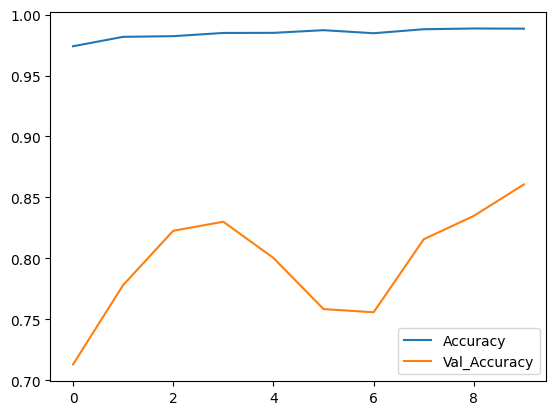

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')

plt.legend()

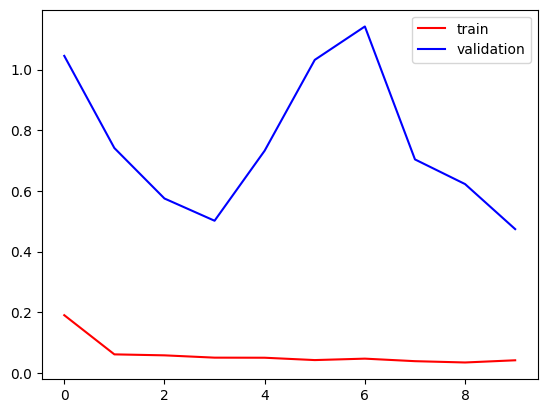

In [16]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import cv2


test_img = cv2.imread("/Users/owner/Desktop/deep-learning/CNN/preview/dog.jpg")


# Resize the image
test_img = cv2.resize(test_img, (150, 150))

# Reshape for model input
test_input = test_img.reshape(1, 150, 150, 3)

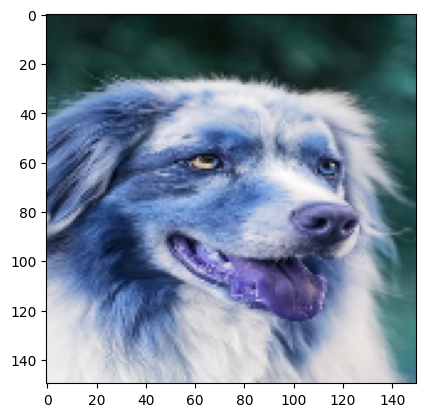

In [18]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


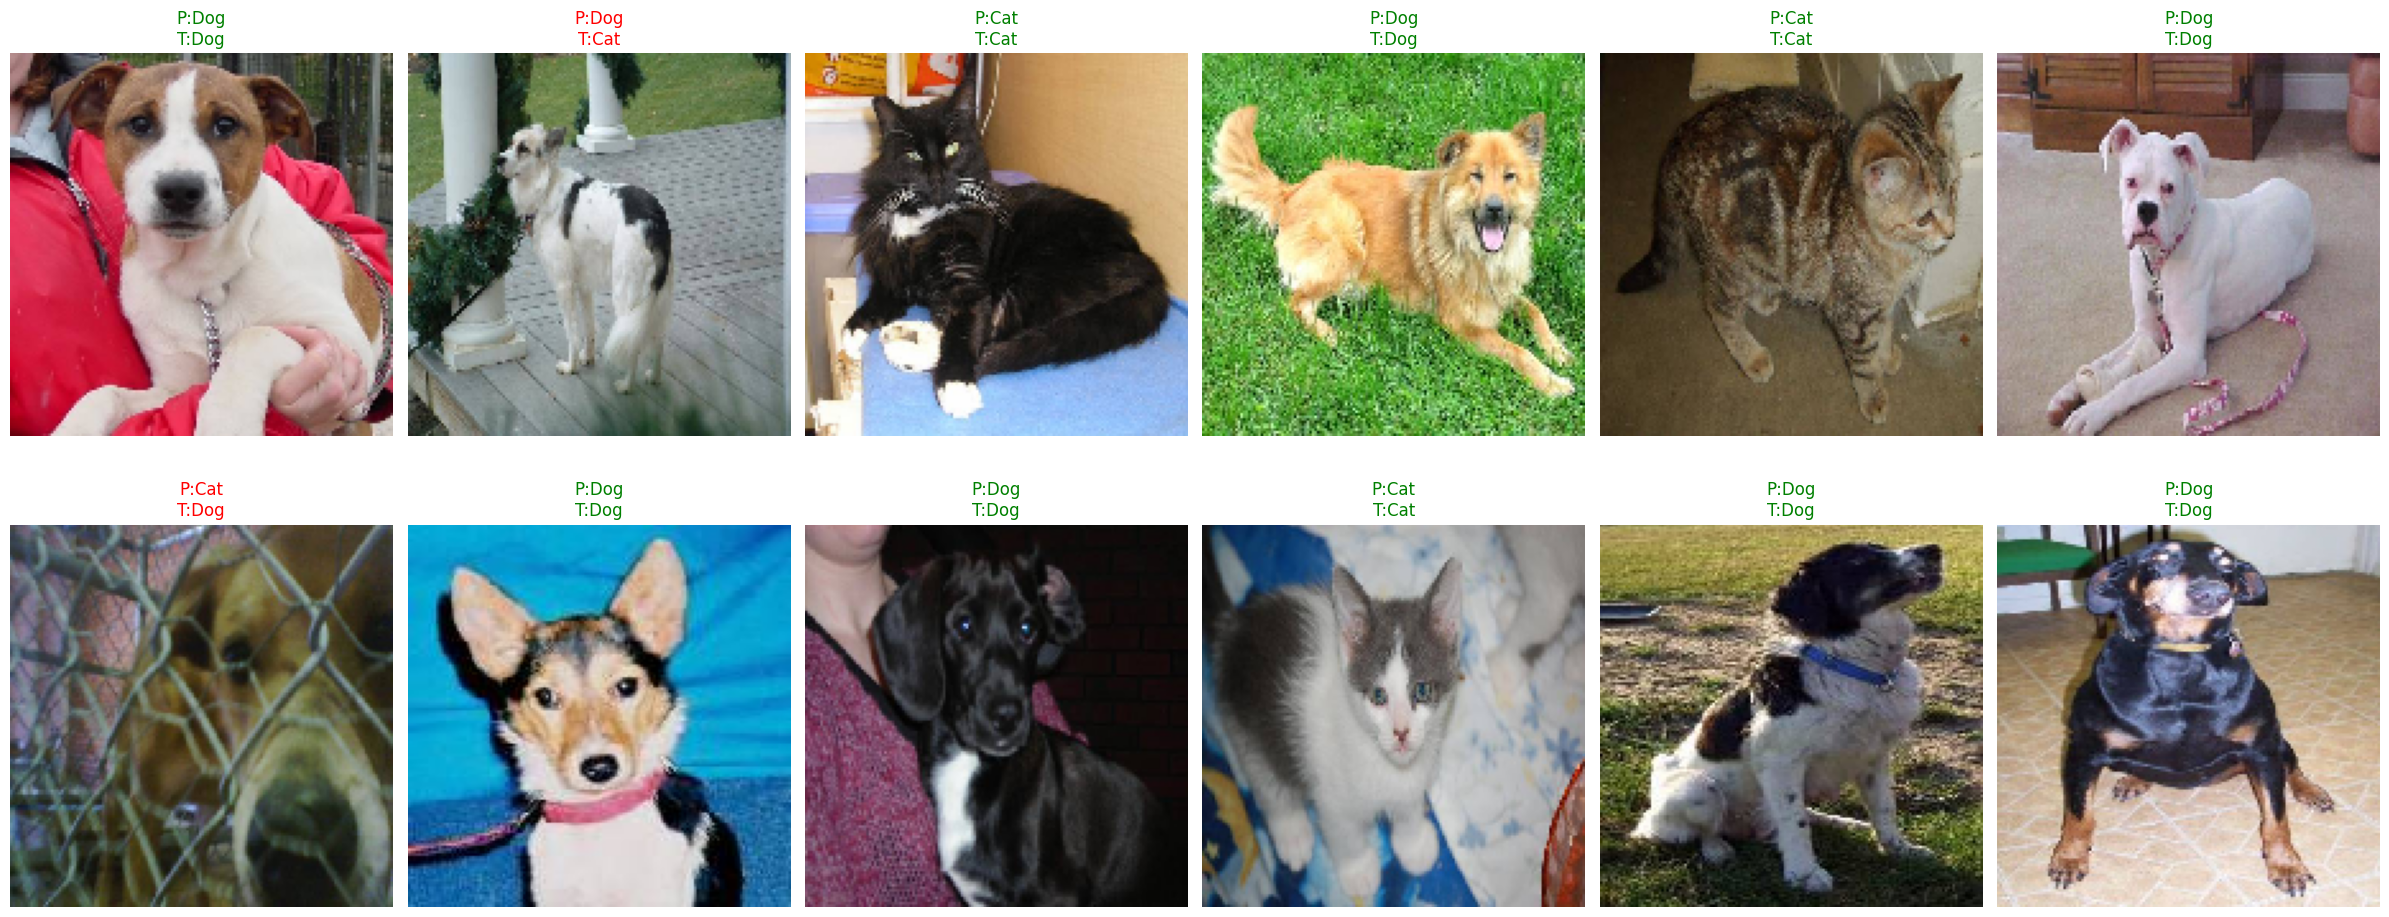

In [33]:


# Get one batch from the validation generator
x_batch, y_batch = next(validation_generator)

# Predict
predictions = model.predict(x_batch)
predicted_classes = (predictions > 0.5).astype("int32")

# Set number of images to display
num_images = 12  # adjust as you like (<= batch_size)
rows, cols = 2, 6
plt.figure(figsize=(24, 10))

for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')

    pred_label = "Dog" if predicted_classes[i] == 1 else "Cat"
    true_label = "Dog" if y_batch[i] == 1 else "Cat"
    color = "green" if pred_label == true_label else "red"

    plt.title(f"P:{pred_label}\nT:{true_label}", color=color, fontsize=12)

plt.tight_layout()
plt.show()

# conclusion 
> accuracy upto 86% gain we can make this uptp 96% but we ahve less data and also we only run  for small epoch with no any optimal structure of the CNN